In [5]:
from torchvision import datasets
from torchvision import transforms
import torch
import torch.nn as nn
import numpy as np

In [6]:
rootdir = '/Data_cfar10'
T = datasets.CIFAR10(rootdir,train=True,download=True)
V = datasets.CIFAR10(rootdir,train=False,download=True)

100%|███████████████████████████████████████████████████████████████| 170498071/170498071 [00:19<00:00, 8728205.54it/s]


Extracting /Data_cfar10\cifar-10-python.tar.gz to /Data_cfar10
Files already downloaded and verified


In [7]:
len(T)

50000

In [8]:
len(V)

10000

In [9]:
type(T)

torchvision.datasets.cifar.CIFAR10

In [10]:
X,y = T[12]

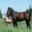

In [11]:
X

In [12]:
T.classes[y]

'horse'

In [16]:
T = datasets.CIFAR10(rootdir,train=True,download=True,transform=transforms.ToTensor())
V = datasets.CIFAR10(rootdir,train=False,download=True,transform=transforms.ToTensor())

Files already downloaded and verified
Files already downloaded and verified


In [34]:
tl = torch.utils.data.DataLoader(T,batch_size=64,shuffle=True,drop_last=True)
vl = torch.utils.data.DataLoader(V,batch_size=64,shuffle=True,drop_last=True)

In [35]:
model = nn.Sequential(
    nn.Linear(3072,100),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(100,10),
    nn.LogSoftmax(dim=1)
)

In [36]:
loss_fn = nn.NLLLoss()

In [37]:
optimizer = torch.optim.Adam(model.parameters(),lr=0.01)
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer,len(tl))

In [38]:
nepochs = 2
for e in range(nepochs):
    e_loss = 0
    for X,y in tl:
        batch_size = X.shape[0]
        y_hat = model(X.view(batch_size,-1))
        loss = loss_fn(y_hat,y)
        e_loss += loss
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    scheduler.step()
    print(float(e_loss))

1817.4580078125
1799.0865478515625


In [33]:
t=0
c=0
with torch.no_grad():
    for Xv,yv in vl:
        batch_size = Xv.shape[0]
        y_hat = model(Xv.view(batch_size,-1))
        _,p = torch.max(y_hat,axis=1)
        t += int(yv.shape[0])
        c += int((p==yv).sum())
print(c/t)

0.09985977564102565


In [39]:
vl

In [40]:
a ,b in vl
a

NameError: name 'a' is not defined